## <p style="text-align: center;">Numerical Algorithms - Homework Assignment 1</p>
**<p style="text-align: center;">VU Numerical Algorithms, summer semester 2018. Due to 24.04.2018. </p>**

**1.** _(0.5 points)_ The IEEE standard 754 (known as the "floating-point standard") specifies the 128-bit word as having 15 bits for the exponent.

 * What is the length of the fraction (mantissa)? What is the machine epsilon?  
 * How many significant decimal digits does this word have?  
 * Why is quadruple precision more than twice as accurate as double precision, which is in turn more than twice as accurate as single precision?

**Answer:**
* Length of the mantissa is 112 bit. Machine epsilon is $\epsilon = 2^{-113}$. ([Source](https://en.wikipedia.org/wiki/Quadruple-precision_floating-point_format))
* $log_{10}(2^{113}) = 34.01..$ - a 128-bit word in the IEEE standard has approximately 34 significant decimal digits. According to [1], due to the leading exponent bit (that might be zero) and whether input/output is a decimal string or a IEEE 754-compliant quadruple-precision number, between 33 and 36 significant decimal digits are possible.
* Because the correlation between the number of significant digits (which is approximately doubled from half- to single- to double-...precision) and the resulting precision is exponential and not linear w.r.t. to the number of available bits/digits - see equation for the calculation of the machine epsilon.

[1] _William Kahan (1 October 1987). "Lecture Notes on the Status of IEEE Standard 754 for Binary Floating-Point Arithmetic"_

---

**2.** _(1 point)_ The IEEE standard 754 specifies that all arithmetic operations are to be
performed as if they were first calculated to infinite precision and then rounded
according to one of four modes. The default rounding mode is to round to the
nearest representable number, with rounding to even (zero least significant bit) in
the case of a tie.

Which of the following statements is true in IEEE arithmetic, assuming that a and
b are normalized floating point numbers and that no exception occurs in the stated
operations? In each case, give a short explanation.   
  
a) $fl(a\;op\;b) = fl(b\;op\;a);\;op = +;\;∗:$  
b) $fl(a + a) = fl(2 ∗ a)$  
c) $fl((a + b) + c) = fl(a + (b + c))$

**Answer:**

a) True, since both specified operations are commutative and there are no intermediate rounding steps.  
b) True, since both expressions are equivalent and there aren't any intermediate rounding steps.  
c) False. Consider that $fl(x\;op\;y) = (x\;op\;y)(1 + \delta)$. In the left-hand side expression $a$ is involved indirectly in two rounding operations, $c$ in one; in the right-hand side expression the other way around. According to the accuracy model before the left-hand side expression yields to an forward error of  
$$
fl((a + b) + c) = ((a + b)(1 + \delta) + c)(1 + \delta) = ((a + b)(1 + \delta)^2 + c(1 + \delta))
$$
while the right-hand side expression yields
$$
fl(a + (b + c)) = (a + (b + c)(1 + \delta))(1 + \delta) = (a(1 + \delta) + (b + c)(1 + \delta)^2)
$$  
Therefore: If $a > c$, the right-hand side expression leads to a smaller forward error; if $c > a$, the left-hand side expression.

---

**3.** _(2.5 points)_ Using the standard model of floating point arithmetic introduced in the lecture, derive forward and backward error bounds for a simple summation, in which the $x_i$ are machine numbers and the sum is evaluated from left to right<sup>1</sup>.

<sup>1</sup>: E.g. $S_4 = ((x_1 + x_2) + x_3) + x_4$.

**Answer:**

Note that we...
* ...follow the procedure presented in Lecture 2 (Error Analysis).
* ...assume that $\delta_1 = \delta_2 = ... \delta_n = \delta$.

We first introduce the base case:
$$
\hat{s}_1 = fl(x_1 + x_2) = (x_1 + x_2)(1 \pm \delta)
$$
Calculation of steps 2 and 3:
$$
\begin{align} 
\hat{s}_2 &= fl(\hat{s}_1 + x_3) = ((x_1 + x_2)(1 \pm \delta) + x_3)(1 \pm \delta) = (x_1 + x_2)(1 \pm \delta)^2 + x_3(1 \pm \delta) \\
\hat{s}_3 &= fl(\hat{s}_2 + x_4) = (\hat{s}_2 + x_4)(1 \pm \delta) = \hat{s}_2(1 \pm \delta) + x_4(1 \pm \delta) = (x_1 + x_2)(1 \pm \delta)^3 + x_3(1 \pm \delta)^2 + x_4(1 \pm \delta)
\end{align} 
$$
  
We induce therefore that the following generalization holds:
$$
\hat{s}_n = (x_1 + x_2)(1\pm\delta)^n + x_3(1\pm\delta)^{n-1} + x_4(1\pm\delta)^{n-2} + ... +  + x_n(1\pm\delta)^{1}
$$

Assuming lemma
$$
\begin{align}
\prod\limits_{i = 1}^{n}(1 \pm \delta)^{\rho i} &= 1 + \theta_n \\
\lvert \theta_n \rvert  \leq \frac{n\epsilon_m}{1 - n\epsilon_m} &=: \gamma_n
\end{align}
$$
is applicable, we can simplify our **backwards error result** to
$$
\hat{s}_n = (x_1 + x_2)(1 + \theta_n) + x_3(1 + \theta_{n-1}) + x_4(1 + \theta_{n-2}) + ... +  + x_n(1 + \theta_{1})
$$
  
Our **absolute/relative forward error bound** is
$$
\begin{align}
afe &=\lvert \sum\limits_{i = 1}^{n}x_i - fl(\sum\limits_{i = 1}^{n}x_i) \rvert \leq \gamma_n \sum\limits_{i = 1}^{n} \lvert x_i \rvert \\
rfe &= \frac{\lvert \sum\limits_{i = 1}^{n}x_i - fl(\sum\limits_{i = 1}^{n}x_i) \rvert}{\sum\limits_{i = 1}^{n}\lvert x_i \rvert} \leq \frac{\gamma_n \sum\limits_{i = 1}^{n} \lvert x_i \rvert}{\sum\limits_{i = 1}^{n}\lvert x_i \rvert}
\end{align}
$$

---

### Programming Exercise

The task is to implement an LU factorization-based linear solver in OCTAVE and to
evaluate its accuracy for various test matrices. The solver consists of computing the LU
decomposition of a square $n×n$ double precision matrix $A$ such that $A = LU$ with lower
triangular $L$ and upper triangular $U$ and subsequent forward and back substitution. In
particular:

#### Part I - LU Decomposition (3 points)
First implement the standard "scalar" (unblocked) algorithm (i.e. three nested loops)
with partial pivoting.

**Answer:**

Note: Input matrices are generated using `rand(n)`, where $2^3 \leq n \leq 2^{11}$.  

The following plot (logarithmic on y-axis) shows the residuals for each value of $n$.

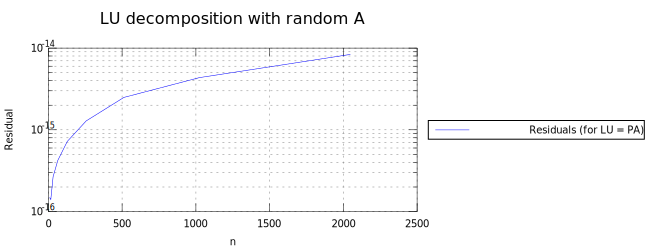

In [5]:
%plot -f svg

# Import routines needed to execute assignment.
source("source/assignment1.m")

# Execute code.
executePart1()

xlabel("n")
ylabel("Residual")

The curve produced by plotting the logarithm of the residuals versus the problem size follows the expected pattern of exponential growth changing into a saturation/plateau phase.

---

#### Part II - Solving a Triangular Linear Systems (1 point)
1. Forward substitution: Write a routine which solves a given $n×n$ lower triangular linear system $Lx = b$ for $x$.
2. Back substitution: Write another routine which solves a given $n × n$ upper triangular linear system $Ux = b$ for $x$.
3. Evaluate the accuracy of your codes for increasing n in terms of the relative residual and the relative forward error. (For the definition of relative residual and relative forward error please see Part III!)

For these experimental evaluations, use randomly generated (non-singular) $L$ and $U$ and determine $b$ such that the exact solution $x$ is a vector of all ones: $x = (1; 1; ...; 1; 1)^T$.

**Answer:**

Note: Matrices $L$ and $U$ were produced by generating a random matrix $A$ and then decomposing this matrix into $L$ and $U$. The original approach was to generate random matrices and extract upper and lower matrices, but the extracted triangular matrices had a very high condition number. See [this thread on moodle](this thread on moodle).

Both forward and backward substitution were implemented utilizing the `linsolve()` function. Note that residuals/forward errors of 0 are ignored by the plotting function (since $log(0)$ is undefined).

The following plot shows the relative residuals and relative forward errors for forward and backward substitution.

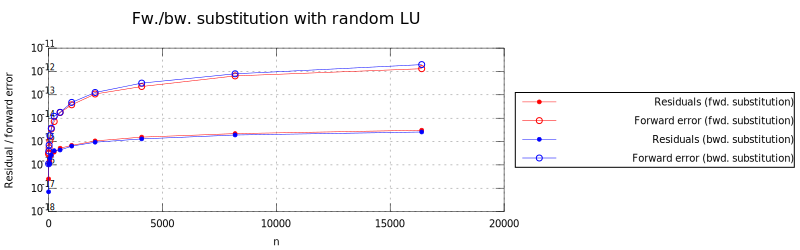

In [6]:
%plot -f svg

# Import routines needed to execute assignment.
source("source/assignment1.m")

# Execute code.
executePart2()

xlabel("n")
ylabel("Residual / forward error")

Interestingly, the residuals for every $n$ - especially larger ones - are up to several magnitudes smaller than the corresponding forward errors (see similar results in part 3).

The forward and backward substitution was implemented following this approach:
```
start index := index of row with one non-zero value
end index := index of row with no non-zero values
x := vector of zeroes with length identical to problem size n

for each row from start index to end index
    subtraction := 0
    for each j in 1 to row length except:    
        if j is not i:
            subtraction += multiply row(j) with x(j)
    x(i) = (b(i) - subtraction) / row(i)
```
The only notable difference between forward and backward substitution is the sequence in which the rows are processed.

---

#### Part III - Numerical Accuracy of LU-Based Linear Solver (4 points)

The main purpose of this part is to experimentally evaluate the numerical accuracy of
the linear systems solver you implemented in Parts I and II for different test matrices
and to compare it with the built-in solver from OCTAVE. You can solve a linear system
Ax = b for x using the n operator (e.g. x = A n b).

1\. Take your LU factorization from Part I and combine it with your triangular linear systems solvers from Part II in order to get a complete LU-based linear solver.  
  
2\. Input data for your experiments:  
&nbsp;&nbsp;&nbsp;&nbsp;a) Generate random test matrices S with entries uniformly distributed in the interval $[-1,1]$.  
&nbsp;&nbsp;&nbsp;&nbsp;b) Generate test matrices H which are defined by $$H_{ij} := \frac{1}{i + j − 1}\;for\;i = 1;...;\;n\;and\;j = 1; ...; n.$$  
&nbsp;&nbsp;&nbsp;&nbsp;c) In all your test cases, determine the corresponding right hand side b of length n such that the exact solution x of the linear system is a vector of all ones: $x = (1; 1; ...; 1; 1)^T$.  

3\. Solve the linear systems $Sx = b$ and $Hx = b$ with your LU-based linear solver and the built-in OCTAVE solver and evaluate the numerical accuracy of the computed solution.  
&nbsp;&nbsp;&nbsp;&nbsp;a) Problem sizes: Start with $n = 2; 3; 4; 5; ...;10$ then incease in increments of 5. For $n > 50$ you can further increase the increment. The largest value of $n$ should be as large as possible (so that your code terminates within a reasonable time).  
&nbsp;&nbsp;&nbsp;&nbsp;b) Accuracy: For the computed solution $\hat{x}$, evaluate the relative residual r:
$$r := \frac{||M\hat{x} - b||_1}{||b||_1} $$
($M$ is $S$ or $H$) as well as the relative forward error $f$:
$$f := \frac{||\hat{x} - x||_1}{||x||_1} $$

4\. For both your and the OCTAVE solver generate the following plots for the different
test matrices:  
&nbsp;&nbsp;&nbsp;&nbsp;a) Relative residual and relative forward error in $\hat{x}$ vs. $n$: One figure for both accuracy metrics for matrix type $S$, another figure for both accuracy metrics for matrix type $H$.

5\. Interpret and explain your experimental results in your report. Do you think that there is a fundamental difference in the numerical accuracy which your LU-based linear solver achieves for the two types of test matrices? If yes, explain the reasons for this difference. How does your solver compare to the OCTAVE version?

**Answer:**

Note: Input matrix $H$ was generated as defined in the task description; $S$ was generated by using $rand(n) * 2 - 1$.

_Comparison to Octave solver:_ The overall trends that can be observed using the two plots shown below are the same - an exponential curve that stagnates increasingly in correlation with a rising $n$. The Octave solver is, except for  some datapoints produced for $Sx = b$, generally better than the manually implemented one. This does not come as a surprise, but particurlarly for $Hx = b$ the Octave solver yields consistently better results - for the forward error (see second point) as well as the residuals.

_Difference in numerical accuracy:_ There is obviously a notable difference in numerical accuracy between the built-in Octave solver and the manually implemented one, especially regarding the forward error with $H$: Both the Octave and the manual solver's results degrade significantly, but the latter one's considerably more so. Exploration of the source code shows that the LU decomposition as well as forward and backward substution per se still work fine for $H$ (with stepwise residuals for $LU = AP; Ly = Pb; Ux = y$ comparable to the ones produced for matrix $S$) - so our implementation seems to be stable, which means that it is not accurate.  

Next we check the condition number of $H$: $$rcond(H) \equiv 10^{-21} \gg \epsilon_m \equiv 10^{-16} $$

Compare with $S$: $$rcond(S) \equiv 10^{-4} \ll \epsilon_m \equiv 10^{-16}$$

Hence we assume $H$ to be an ill-conditioned matrix that will cause a deterioration in numerical accuracy. A higher condition number dictates that the forward error is higher than the backwards error (and thus the residual):
$$
\frac{||\Delta x||}{||\hat{x}||} \leq cond(A) \frac{||E||}{||A||}
$$

Thus we infer that 
* the inferior results achieved in this task for $H$ when compared to $S$ is due to $H$ being ill-conditioned (and $S$ being well-conditioned) and that
* the reason for the divergence between the results computed by the Octave and our solver is not due to measures implemented in the Octave solver that reduce constants in the error bounds, especially for ill-conditioned matrices.

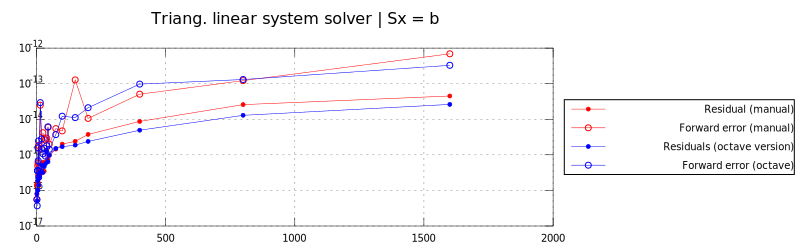

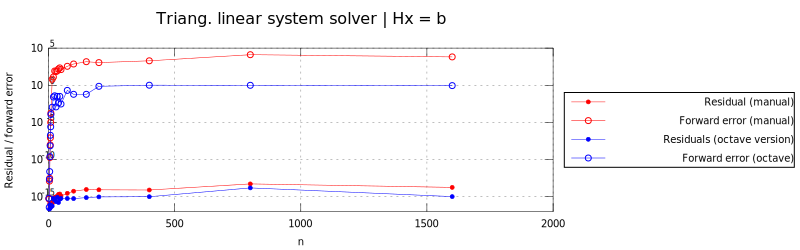

In [7]:
%plot -f svg

# Import routines needed to execute assignment.
source("source/assignment1.m")

# Execute code.
executePart3()